In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [109]:
df = pd.read_csv("coffee_data.csv")

In [113]:
# Take a look at the data
df.head()

,Districts,Total-Area(Ha),Production(MT),Yield(Kg/Ha),Farmers
0,Arghakhachi,131,29,221,1656
1,Baglung,62,15,242,1338
2,Bhojpur,15,2,133,162
3,Dhading,71,15,211,728
4,Gorkha,33,5,152,741


In [111]:
# Drop un-necessary columns
df = df.drop(['_id','S.N'], axis = 1)
df = df.drop([24])
#rename columns to something easy
df.columns = ['Districts','Total-Area(Ha)', 'Production(MT)','Yield(Kg/Ha)','Farmers']

In [114]:
# Descriptive statistics
df.describe()

,Total-Area(Ha),Production(MT),Yield(Kg/Ha),Farmers
count,25.000000,25.000000,25.0000,25.000000
mean,202.640000,40.720000,256.6000,2570.080000
std,509.244201,102.928988,192.6547,6337.776233
min,15.000000,2.000000,77.0000,162.000000
25%,33.000000,12.000000,174.0000,621.000000
50%,92.000000,19.000000,215.0000,980.000000
75%,146.000000,30.000000,252.0000,1789.000000
max,2618.000000,532.000000,1107.0000,32581.000000



1. Question 1 : Increase in area increases the total production
2. Question 2 : Larger the area , more number of farmers are required
3. Question 3 : More Farmers mean more increase in yeild per hectare


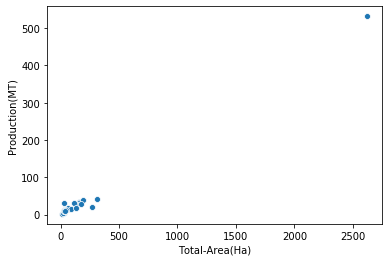

In [115]:
# look at the relationship between area and total production, area and farmers
plot_area_prod = sns.scatterplot(df['Total-Area(Ha)'], df['Production(MT)'])


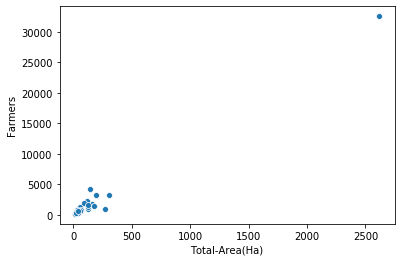

In [116]:
plot_area_farmers = sns.scatterplot(df['Total-Area(Ha)'], df['Farmers'])


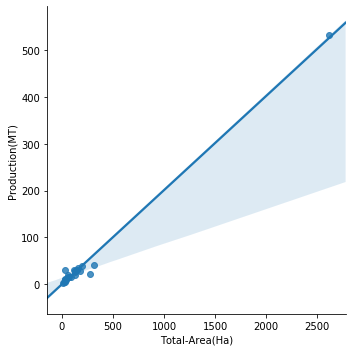

In [186]:
plot_farmers_yield = sns.lmplot('Total-Area(Ha)', 'Production(MT)', data = df)


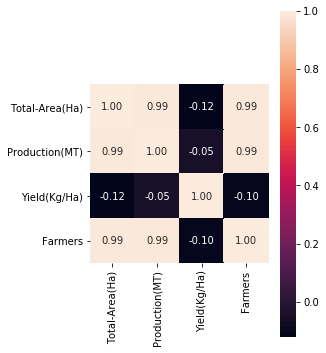

In [187]:
#correration matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(4,6))
# sns.heatmap(corrmat,vmax=1, square=True
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})


In [174]:
# Calculate pearson correlation
from scipy.stats.stats import pearsonr
import numpy as np

In [235]:
pc, pval = pearsonr(df['Production(MT)'], df['Total-Area(Ha)'])
#here pc is r or correlation, and  pval 
print(pc,pval)

0.9949702906104382 1.7194250426617838e-24


In [189]:
# Calculate Standard deviations
x = np.std(df['Total-Area(Ha)'], ddof = 1)
y = np.std(df['Production(MT)'], ddof = 1)
x,y
x_mean = np.mean(df['Total-Area(Ha)'])
y_mean = np.mean(df['Production(MT)'])

In [190]:
# calculate the slope of the line
slp = pc*(y/x)
# The y intercept always goes through the mean of x and y, therefore y intercept will be y = mx+b
# or b = mx - y
y_int = y_mean - (slp * x_mean) 


In [205]:
regression_line = []
for i in df['Total-Area(Ha)']:
#     print(i)
    regression_line.append((slp*i)+ y_int)

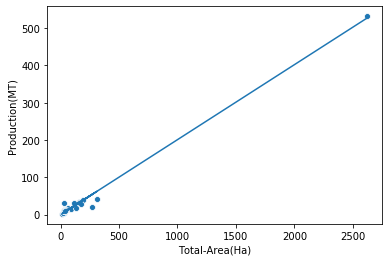

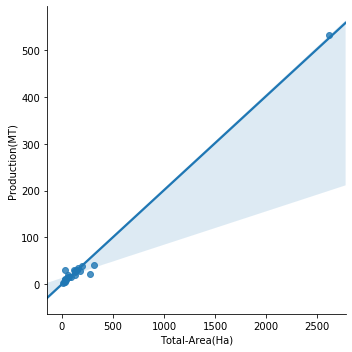

In [206]:
sns.scatterplot('Total-Area(Ha)', 'Production(MT)', data = df)
plt.plot(df['Total-Area(Ha)'],regression_line)
plot_farmers_yield = sns.lmplot('Total-Area(Ha)', 'Production(MT)', data = df)



In [207]:
slp,y_int
# Std error of estimate
#Confidence interval for expected value


(0.20110447067135154, -0.03180993684267719)

In [208]:
# calculating the slope , intercept for a line
import scipy.stats as stats
slope,intercept,rval,pval, stderr = stats.linregress(df['Total-Area(Ha)'],df['Production(MT)'])

In [209]:
slope,intercept,rval,pval
# r val 

(0.20110447067135154,
 -0.03180993684267719,
 0.9949702906104382,
 1.7194250426617893e-24)

In [210]:
# Predicting the values accroding the regression  y = slope * x + intercept
# for area 2000 hec
production_2000  = (slope*2000) + intercept
production_2000_manual = (slp * 2000) + y_int

In [211]:
production_2000

402.17713140586045

In [212]:
production_2000_manual

402.17713140586045

In [213]:
# Additional yield per farmer
production_2001  = (slope*2001) + intercept
print(production_2001)

402.3782358765318


In [216]:
# This is the slope. The slope is the change in y , when x is changed by each units
production_2001 - production_2000
# In our case here for increase in unit area the total production goes up by 0.20

0.20110447067133919

In [217]:
# What if there is no land
production_0 = (slope*0) + intercept

In [219]:
production_0

-0.03180993684267719

In [220]:
# if there is no land the production is 0, however for unit increase in the land the production goes up by 0.20. 
# We can see that the land and the production are positively correlated. 

In [229]:
# How much land would you need to produce 100 MT of coffee
land_required_100 = (100 - intercept)/slope

In [230]:
land_required_100

497.41216395092687

In [243]:
slope,intercept,rval,pval,stderr

(0.20110447067135154,
 -0.03180993684267719,
 0.9949702906104382,
 1.7194250426617838e-24,
 0.004221699887030584)

In [247]:
# using sm model for hypothesis testing 
import statsmodels.api as sm
X = df['Total-Area(Ha)']
Y = df['Production(MT)']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         Production(MT)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2269.
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.72e-24
Time:                        15:22:27   Log-Likelihood:                -93.292
No. Observations:                  25   AIC:                             190.6
Df Residuals:                      23   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0318      2.274     -0.

In [248]:
0.989 > 0.05

True